In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd '/content/drive/My Drive/IEEE BigMM/IEEE-BigMM'
%ls
%cd 'Code/'

/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM
 Code/   Data/   README.md  'Stats .txt'   temp.txt
/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM/Code


In [59]:
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("final_dataset.csv")
df.head(20)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s #MeToo https://t.co/nN3hbEHz85\n,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption - no:2\n,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption - no:2\n,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


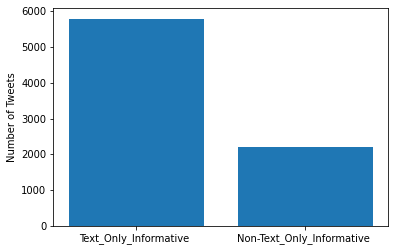

In [61]:
#Visualization
sarcastic=0
for i in range(len(df["Text_Only_Informative"])):
    if df["Text_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Text_Only_Informative"])-sarcastic
label_values={"Text_Only_Informative " : sarcastic, "Non-Text_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

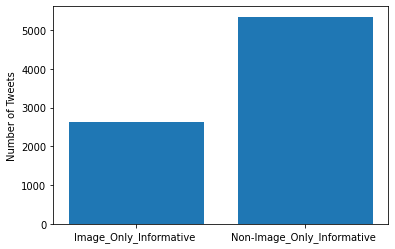

In [62]:
#Visualization
sarcastic=0
for i in range(len(df["Image_Only_Informative"])):
    if df["Image_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Image_Only_Informative"])-sarcastic
label_values={"Image_Only_Informative " : sarcastic, "Non-Image_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

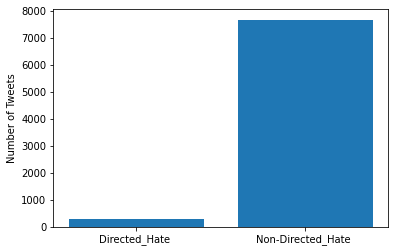

In [63]:
#Visualization
sarcastic=0
for i in range(len(df["Directed_Hate"])):
    if df["Directed_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Directed_Hate"])-sarcastic
label_values={"Directed_Hate " : sarcastic, "Non-Directed_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

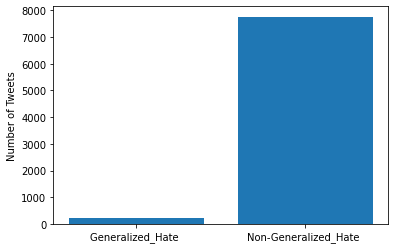

In [64]:
#Visualization
sarcastic=0
for i in range(len(df["Generalized_Hate"])):
    if df["Generalized_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Generalized_Hate"])-sarcastic
label_values={"Generalized_Hate " : sarcastic, "Non-Generalized_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

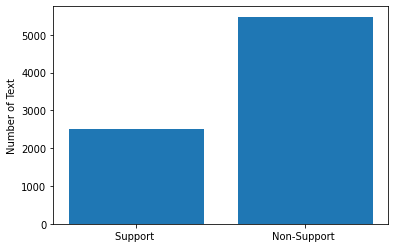

Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points


In [65]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Text")
plt.show()

print ("Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points")

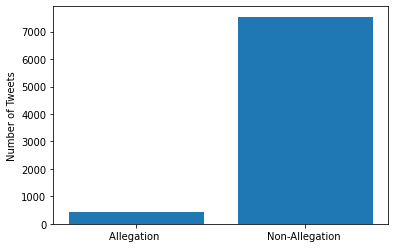

Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.
BiLSTM giving 97.65 aacuracy


In [66]:
#Visualization
sarcastic=0
for i in range(len(df["Allegation"])):
    if df["Allegation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Allegation"])-sarcastic
label_values={"Allegation " : sarcastic, "Non-Allegation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

print ("Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.")
print ("BiLSTM giving 97.65 aacuracy")

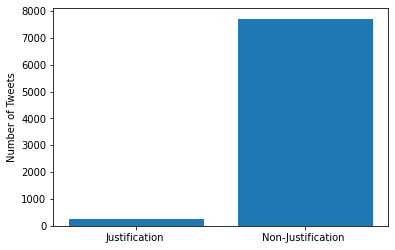

In [67]:
#Visualization
sarcastic=0
#sarcastic is just a variable to keep count of class 1
for i in range(len(df["Justification"])):
    if df["Justification"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Justification"])-sarcastic
label_values={"Justification " : sarcastic, "Non-Justification " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

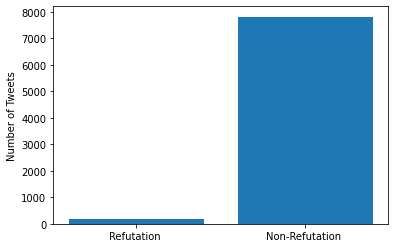

In [68]:
#Visualization
sarcastic=0
for i in range(len(df["Refutation"])):
    if df["Refutation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Refutation"])-sarcastic
label_values={"Refutation " : sarcastic, "Non-Refutation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

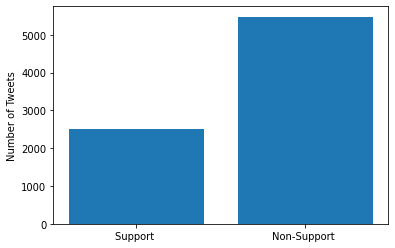

In [69]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

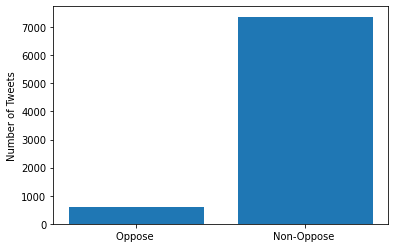

In [70]:
#Visualization
sarcastic=0
for i in range(len(df["Oppose"])):
    if df["Oppose"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Oppose"])-sarcastic
label_values={"Oppose " : sarcastic, "Non-Oppose " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

In [71]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\n', ' ', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
df.head(20)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s #MeToo https://t.co/nN3hbEHz85,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption - no:2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption - no:2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [74]:
for i,tweet in enumerate(df.text):
    #Remove hyperlinks
    #Removing links from all tweets gathered from scraping the data
    temp = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', tweet)
    df.text[i] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [75]:
df.head(10)
#Text be moving even though checkpoint is reached 

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s #MeToo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption - no:2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption - no:2,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s #MeToo moment on #TheOffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
(string.punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
string_punctuation2='!"#$%&\()*+-/:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in string_punctuation2])
    text = re.sub('[0-9]+', '', text)
    return text

df['text'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post Domestic Violence Awareness Hasn't Ca...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s MeToo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption no,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' MeToo named and shamed men i...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption no,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s MeToo moment on TheOffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by TheEconomist about the...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear amp...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [78]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

# df['text'] = df['text'].apply(lambda x: tokenization(x.lower()))
# df.head(10)

In [79]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
separator=' '
df['text'] = df['text'].apply(lambda x: separator.join(remove_stopwords(tokenization(x.lower()))))
df.head(10)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,new post domestic violence awareness caught me...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,domestic violence awareness caught metoo,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,mother nature metoo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,high time metoo named shamed men media adverti...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,idea persistence involves systematically igno...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,meredith metoo moment theoffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,interesting analysis theeconomist change perce...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,shock hey old bill clear amp every single imwi...,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [81]:
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# df['text'] = df['text'].apply(lambda x: stemming(x))
# df.head(10)

In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['text'] = df['text'].apply(lambda x: separator.join(lemmatizer(tokenization(x))))
# type(df['text'].apply(lambda x: lemmatizer(tokenization(x))).head(10)[0])
df.head(10)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,new post domestic violence awareness caught me...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,domestic violence awareness caught metoo,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,mother nature metoo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,high time metoo named shamed men medium advert...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,idea persistence involves systematically igno...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,meredith metoo moment theoffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,interesting analysis theeconomist change perce...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,shock hey old bill clear amp every single imwi...,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [85]:
df.to_csv("clean_datav3.csv")

In [86]:
%ls

Bert_sarcasm.ipynb         clean_datav3.csv   Sarcasm/
Bert_sarcasmv2colab.ipynb  Data_clean.ipynb   Support_Using_ML_Classifier.ipynb
clean_datav2.csv           final_dataset.csv
